In [28]:
import os
import pymysql
import mysql.connector
from sqlalchemy import create_engine

import pandas as pd
import matplotlib.pyplot as plt

In [29]:
host_name = "ds2002.org" #"compid-mysql.mysql.database.azure.com"
host_ip = "ds2002.org"
port = "3306"

user_id = "nnt6qd"
pwd = "nnt6qd!"
db_name = "nnt6qd"


1. Create a connection to an SQLite database file named student_grades.db. If the
database file does not exist, SQLite will automatically create it.
2. Create a cursor object to interact with the database.
3. You will need two tables for this assignment:
• students: A table to store student information.
• grades: A table to store student grades for different subjects
4. Insert at least 5 students into the students table and at least 3 grades for each student into the grades table.

In [30]:
conn = pymysql.connect(host=host_name, user=user_id, password=pwd, database=db_name)
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INT Auto_INCREMENT PRIMARY KEY,
    first_name VARCHAR(255),
    last_name VARCHAR(255) )
''')


cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INT Auto_INCREMENT PRIMARY KEY,
    student_id INT,
    subject VARCHAR(255),
    grade INT,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

students_data = [
    (1, 'Steve', 'Smith'),
    (2, 'Aaliyah', 'Parker'),
    (3, 'Pamala', 'Owens'),
    (4, 'Brittny', 'Hill'),
    (5, 'Lincoln', 'Walker')
]

grades_data = [
    (1, 1, 'Math', '100'),
    (2, 1, 'English', '100'),
    (3, 1, 'History', '100'),
    (4, 2, 'Math', '90'),
    (5, 2, 'English', '95'),
    (6, 2, 'History', '97'),
    (7, 3, 'Math', '86'),
    (8, 3, 'English', '88'),
    (9, 3, 'History', '84'),
    (10, 4, 'Math', '82'),
    (11, 4, 'English', '83'),
    (12, 4, 'History', '85'),
    (13, 5, 'Math', '76'),
    (14, 5, 'English', '74'),
    (15, 5, 'History', '78')
]

cursor.executemany('''
INSERT INTO students (student_id, first_name, last_name)
VALUES (%s, %s, %s)
ON DUPLICATE KEY UPDATE
    first_name = VALUES(first_name),
    last_name = VALUES(last_name)
''', students_data)

cursor.executemany('''
INSERT INTO grades (grade_id, student_id, subject, grade)
VALUES (%s, %s, %s, %s)
ON DUPLICATE KEY UPDATE
    student_id = VALUES(student_id),
    subject = VALUES(subject),
    grade = VALUES(grade)
''', grades_data)
conn.commit()
conn.close()

Retrieve all students' names and their grades.

In [34]:
conn = pymysql.connect(host=host_name, user=user_id, password=pwd, database=db_name)
cursor = conn.cursor()
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON grades.student_id = students.student_id;
 ''')
results = cursor.fetchall()

for row in results:
    print(row)


('Steve', 'Smith', 'Math', 100)
('Steve', 'Smith', 'English', 100)
('Steve', 'Smith', 'History', 100)
('Aaliyah', 'Parker', 'Math', 90)
('Aaliyah', 'Parker', 'English', 95)
('Aaliyah', 'Parker', 'History', 97)
('Pamala', 'Owens', 'Math', 86)
('Pamala', 'Owens', 'English', 88)
('Pamala', 'Owens', 'History', 84)
('Brittny', 'Hill', 'Math', 82)
('Brittny', 'Hill', 'English', 83)
('Brittny', 'Hill', 'History', 85)
('Lincoln', 'Walker', 'Math', 76)
('Lincoln', 'Walker', 'English', 74)
('Lincoln', 'Walker', 'History', 78)


Find the average grade for each student.


In [35]:
conn = pymysql.connect(host=host_name, user=user_id, password=pwd, database=db_name)
cursor = conn.cursor()
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON grades.student_id = students.student_id
GROUP BY students.student_id, students.first_name, students.last_name;
 ''')
results = cursor.fetchall()

for row in results:
    print(row)


('Steve', 'Smith', Decimal('100.0000'))
('Aaliyah', 'Parker', Decimal('94.0000'))
('Pamala', 'Owens', Decimal('86.0000'))
('Brittny', 'Hill', Decimal('83.3333'))
('Lincoln', 'Walker', Decimal('76.0000'))


Find the student with the highest average grade.

In [36]:
conn = pymysql.connect(host=host_name, user=user_id, password=pwd, database=db_name)
cursor = conn.cursor()
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade 
FROM students
JOIN grades ON grades.student_id = students.student_id
GROUP BY students.student_id, students.first_name, students.last_name
ORDER BY average_grade DESC LIMIT 1;
               
 ''')
results = cursor.fetchall()

for row in results:
    print(row)


('Steve', 'Smith', Decimal('100.0000'))


Find the average grade for the Math subject

In [41]:
conn = pymysql.connect(host=host_name, user=user_id, password=pwd, database=db_name)
cursor = conn.cursor()
cursor.execute('''
SELECT AVG(grades.grade) AS average_math_grade 
FROM grades
WHERE grades.subject = "Math";            
 ''')
results = cursor.fetchall()

for row in results:
    print(row)


(Decimal('86.8000'),)


List all students who scored above 90 in any subject

In [69]:
conn = pymysql.connect(host=host_name, user=user_id, password=pwd, database=db_name)
cursor = conn.cursor()
cursor.execute('''
SELECT DISTINCT students.first_name, students.last_name
FROM students
JOIN grades ON grades.student_id = students.student_id
WHERE grades.grade > 90;
               
 ''')
results = cursor.fetchall()

for row in results:
    print(row)


('Steve', 'Smith')
('Aaliyah', 'Parker')


1. Use Pandas to load the data from the students and grades tables into DataFrames.
2. Use JOIN queries to combine the data from both tables into a single DataFrame that
includes each student's name, subject, and grade

In [50]:
studentsDF = pd.read_sql('SELECT * FROM students', conn)
gradesDF = pd.read_sql('SELECT * FROM grades', conn)
student_gradesDF =  pd.read_sql('SELECT students.first_name, students.last_name, grades.subject, grades.grade FROM students JOIN grades ON students.student_id = grades.student_id;', conn)
# print(student_gradesDF)

   first_name last_name  subject  grade
0       Steve     Smith     Math    100
1       Steve     Smith  English    100
2       Steve     Smith  History    100
3     Aaliyah    Parker     Math     90
4     Aaliyah    Parker  English     95
5     Aaliyah    Parker  History     97
6      Pamala     Owens     Math     86
7      Pamala     Owens  English     88
8      Pamala     Owens  History     84
9     Brittny      Hill     Math     82
10    Brittny      Hill  English     83
11    Brittny      Hill  History     85
12    Lincoln    Walker     Math     76
13    Lincoln    Walker  English     74
14    Lincoln    Walker  History     78


C:\Users\tiffa\AppData\Local\Temp\ipykernel_30244\2234886177.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  studentsDF = pd.read_sql('SELECT * FROM students', conn)
C:\Users\tiffa\AppData\Local\Temp\ipykernel_30244\2234886177.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  gradesDF = pd.read_sql('SELECT * FROM grades', conn)
C:\Users\tiffa\AppData\Local\Temp\ipykernel_30244\2234886177.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  student_gradesDF =  pd.read_sql('SELECT students.first_name, students.last_name,

Plot the average grades for each student.

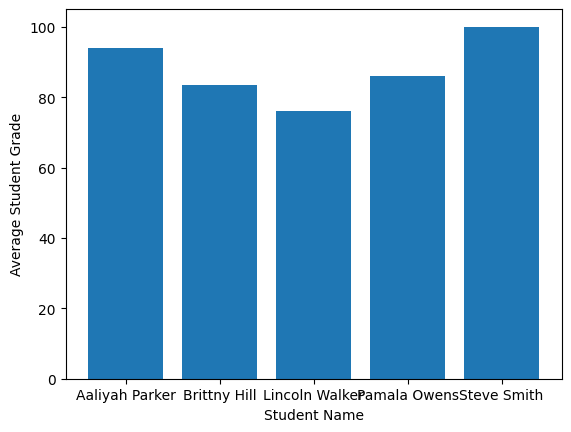

In [70]:
avgGradeStudent = student_gradesDF.groupby(['first_name', 'last_name'])['grade'].mean().reset_index()
avgGradeSubject = student_gradesDF.groupby(['subject'])['grade'].mean().reset_index()

def bar_chart(x, y, xLabel, YLabel):
    plt.figure()
    plt.bar(x,y)
    plt.xlabel(xLabel)
    plt.ylabel(YLabel)
    plt.show()

bar_chart(
    avgGradeStudent["first_name"] + ' ' + avgGradeStudent["last_name"],
    avgGradeStudent["grade"],
    "Student Name",
    "Average Student Grade"
)

Create a bar chart showing the average grade for each subject.

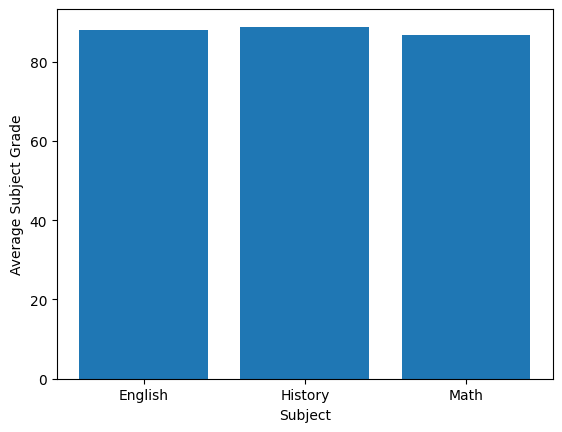

In [57]:
bar_chart(
    avgGradeSubject["subject"],
    avgGradeSubject["grade"],
    "Subject",
    "Average Subject Grade"
)

Bonus Task: (5pts)
• Implement a query that finds the student with the highest grade in each subject.
• Visualize the results using a grouped bar chart.


In [74]:
onn = pymysql.connect(host=host_name, user=user_id, password=pwd, database=db_name)
cursor = conn.cursor()
cursor.execute('''
SELECT grades.subject, students.first_name, students.last_name, grades.grade
FROM grades
JOIN students ON grades.student_id = students.student_id
WHERE (grades.subject, grades.grade) IN ( SELECT subject, MAX(grade) FROM grades GROUP BY subject);
               
 ''')
results = cursor.fetchall()

for row in results:
    print(row)


('Math', 'Steve', 'Smith', 100)
('English', 'Steve', 'Smith', 100)
('History', 'Steve', 'Smith', 100)


C:\Users\tiffa\AppData\Local\Temp\ipykernel_30244\2947904339.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  student_highestGradesDF =  pd.read_sql('SELECT grades.subject, students.first_name, students.last_name, grades.grade FROM grades JOIN students ON grades.student_id = students.student_id WHERE (grades.subject, grades.grade) IN ( SELECT subject, MAX(grade) FROM grades GROUP BY subject);', conn)


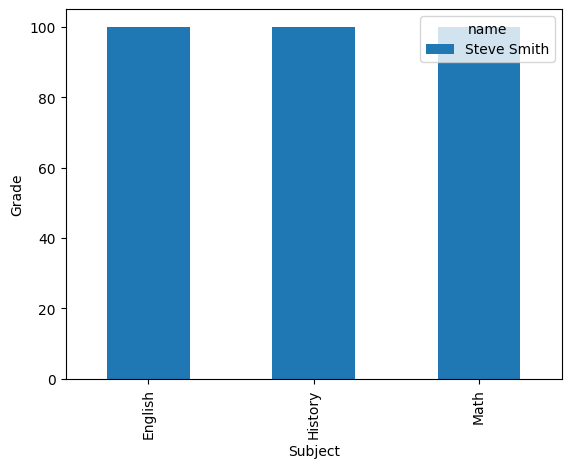

In [79]:
student_highestGradesDF =  pd.read_sql('SELECT grades.subject, students.first_name, students.last_name, grades.grade FROM grades JOIN students ON grades.student_id = students.student_id WHERE (grades.subject, grades.grade) IN ( SELECT subject, MAX(grade) FROM grades GROUP BY subject);', conn)
student_highestGradesDF['name'] = student_highestGradesDF['first_name'] + ' ' + student_highestGradesDF['last_name']
df = student_highestGradesDF.pivot(index='subject', columns='name', values='grade')
df.plot(kind='bar')

plt.xlabel('Subject')
plt.ylabel('Grade')
plt.show()